# **Himalayas Dataset**
## By Ariella Zwerling

In [1]:
# Using ChatGPT to convert R setup instructions to Python

import os
import requests
import zipfile
import tempfile
import pandas as pd
from dbfread import DBF

# Step 1: Set up the URL and file paths
url = "https://www.himalayandatabase.com/downloads/Himalayan%20Database.zip"
zip_file = tempfile.NamedTemporaryFile(suffix=".zip", delete=False)
extracted_dir = tempfile.mkdtemp()

# Step 2: Download the ZIP file
response = requests.get(url)
with open(zip_file.name, "wb") as f:
    f.write(response.content)

# Step 3: Extract the ZIP file
with zipfile.ZipFile(zip_file.name, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Test to confirm the extracted contents
print(os.listdir(extracted_dir))

# Step 4: Locate the peaks.DBF and exped.DBF files
dbf_file_peaks = os.path.join(extracted_dir, "Himalayan Database", "HIMDATA", "peaks.DBF")
dbf_file_exped = os.path.join(extracted_dir, "Himalayan Database", "HIMDATA", "exped.DBF")
print(dbf_file_peaks)  # Debugging: Verify the file path
print(dbf_file_exped)  # Debugging: Verify the file path

# Step 5: Read the .DBF files
peaks_data = pd.DataFrame(iter(DBF(dbf_file_peaks)))
exped_data = pd.DataFrame(iter(DBF(dbf_file_exped)))

# Step 6: Convert the data to a tidy DataFrame
peaks_temp = peaks_data.copy()
exped_temp = exped_data.copy()

# Preview the data
print(peaks_temp.info())
print(exped_temp.info())

# Clean up temporary files (optional)
os.remove(zip_file.name)

# Step 7: Recode integer variables in the peaks dataset
peaks_temp["HIMAL_FACTOR"] = peaks_temp["HIMAL"].map({
    0: "Unclassified", 1: "Annapurna", 2: "Api/Byas Risi/Guras", 3: "Damodar",
    4: "Dhaulagiri", 5: "Ganesh/Shringi", 6: "Janak/Ohmi Kangri", 7: "Jongsang",
    8: "Jugal", 9: "Kangchenjunga/Simhalila", 10: "Kanjiroba", 11: "Kanti/Palchung",
    12: "Khumbu", 13: "Langtang", 14: "Makalu", 15: "Manaslu/Mansiri", 16: "Mukut/Mustang",
    17: "Nalakankar/Chandi/Changla", 18: "Peri", 19: "Rolwaling", 20: "Saipal"
}).fillna("Unknown")

peaks_temp["REGION_FACTOR"] = peaks_temp["REGION"].map({
    0: "Unclassified", 1: "Kangchenjunga-Janak", 2: "Khumbu-Rolwaling-Makalu", 
    3: "Langtang-Jugal", 4: "Manaslu-Ganesh", 5: "Annapurna-Damodar-Peri", 
    6: "Dhaulagiri-Mukut", 7: "Kanjiroba-Far West"
}).fillna("Unknown")

peaks_temp["PHOST_FACTOR"] = peaks_temp["PHOST"].map({
    0: "Unclassified", 1: "Nepal only", 2: "China only", 3: "India only",
    4: "Nepal & China", 5: "Nepal & India", 6: "Nepal, China & India"
}).fillna("Unknown")

peaks_temp["PSTATUS_FACTOR"] = peaks_temp["PSTATUS"].map({
    0: "Unknown", 1: "Unclimbed", 2: "Climbed"
}).fillna("Invalid")

# Convert categorical columns to categorical data type
peaks_temp["HIMAL_FACTOR"] = peaks_temp["HIMAL_FACTOR"].astype("category")
peaks_temp["PHOST_FACTOR"] = peaks_temp["PHOST_FACTOR"].astype("category")
peaks_temp["PSTATUS_FACTOR"] = peaks_temp["PSTATUS_FACTOR"].astype("category")

# Step 8: Recode integer variables in the expeditions dataset
exped_temp["SEASON_FACTOR"] = exped_temp["SEASON"].map({
    0: "Unknown", 1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"
})

exped_temp["HOST_FACTOR"] = exped_temp["HOST"].map({
    0: "Unknown", 1: "Nepal", 2: "China", 3: "India"
})

exped_temp["TERMREASON_FACTOR"] = exped_temp["TERMREASON"].map({
    0: "Unknown", 1: "Success (main peak)", 2: "Success (subpeak, foresummit)",
    3: "Success (claimed)", 4: "Bad weather (storms, high winds)",
    5: "Bad conditions (deep snow, avalanching, falling ice, or rock)",
    6: "Accident (death or serious injury)",
    7: "Illness, AMS, exhaustion, or frostbite",
    8: "Lack (or loss) of supplies, support or equipment", 9: "Lack of time",
    10: "Route technically too difficult, lack of experience, strength, or motivation",
    11: "Did not reach base camp", 12: "Did not attempt climb", 13: "Attempt rumored", 14: "Other"
})

# Filter expeditions dataset for years 2020-2024
exped_tidy = exped_temp[exped_temp["YEAR"].astype(str).str.match(r"202[01234]")]

['Himalayan Database']
/var/folders/l7/dn0hll995195kvrl49_9xmp40000gn/T/tmp3fb1_0jt/Himalayan Database/HIMDATA/peaks.DBF
/var/folders/l7/dn0hll995195kvrl49_9xmp40000gn/T/tmp3fb1_0jt/Himalayan Database/HIMDATA/exped.DBF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PEAKID      480 non-null    object
 1   PKNAME      480 non-null    object
 2   PKNAME2     480 non-null    object
 3   LOCATION    480 non-null    object
 4   HEIGHTM     480 non-null    int64 
 5   HEIGHTF     480 non-null    int64 
 6   HIMAL       480 non-null    int64 
 7   REGION      480 non-null    int64 
 8   OPEN        480 non-null    bool  
 9   UNLISTED    480 non-null    bool  
 10  TREKKING    480 non-null    bool  
 11  TREKYEAR    480 non-null    object
 12  RESTRICT    480 non-null    object
 13  PHOST       480 non-null    int64 
 14  PSTATUS     480 non-null    int

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.formula.api as sm
import seaborn as sns
from matplotlib import rcParams

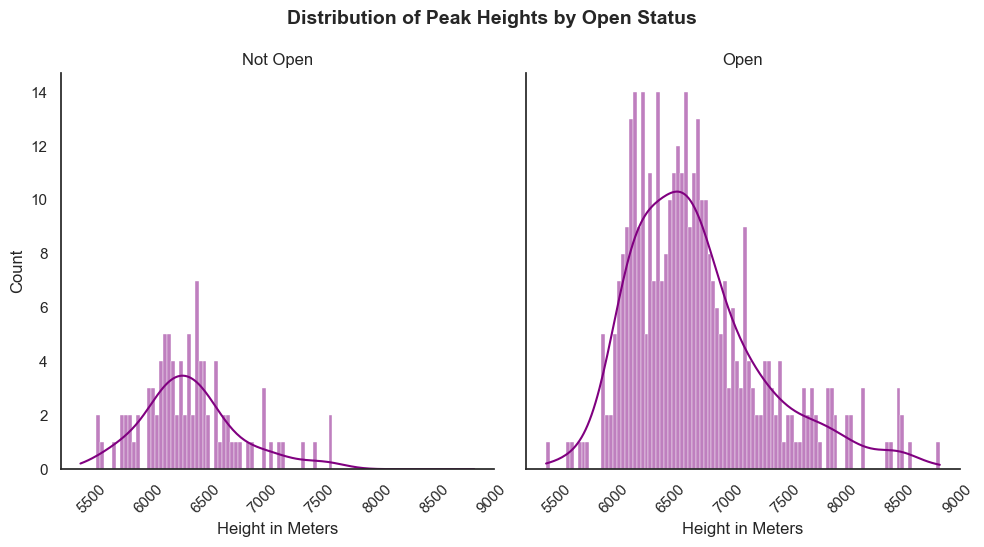

In [10]:
fig = sns.displot(peaks_temp, 
                    x="HEIGHTM", 
                    col="OPEN", 
                    bins = 100, 
                    kde = True, 
                    multiple="dodge",
                   color = "purple")

fig.fig.suptitle("Distribution of Peak Heights by Open Status", 
                   fontsize=14, 
                   weight='bold',
                  y = 1.05)

sns.set_theme(
    context='notebook', 
    style="white",
    palette="husl",
    font='sans-serif', 
    font_scale=1, 
    color_codes=True)

axes = fig.axes.flatten()
axes[0].set_title("Not Open", fontsize=12)
axes[1].set_title("Open", fontsize=12)

rcParams['figure.figsize'] = 10,50

plt.ylabel('Counts')

for ax in axes:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.set_xlabel('Height in Meters')

    
plt.show()